# **Early Stopping - Improving Neural Network**

In [162]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import tensorflow
import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report,r2_score

In [163]:
df = pd.read_csv('employee_attrition_data.csv')
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [164]:
df['Attrition'].value_counts()

Attrition
0    505
1    495
Name: count, dtype: int64

In [165]:
df.shape

(1000, 11)

In [166]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours',
       'Promotion_Last_5Years', 'Salary', 'Attrition'],
      dtype='object')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [168]:
df.isnull().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [169]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Employee_ID', 'Attrition']),
                                                    df['Attrition'],
                                                    test_size=0.2,
                                                    random_state=42)

In [170]:
numerical_columns = [0, 4, 5, 6, 7, 8]
categorical_columns = [1, 2, 3]

In [171]:
handle_numerical = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=11)),
    ('scale', MinMaxScaler())
])

In [172]:
handle_categorical = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [173]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('categorical', handle_categorical, categorical_columns)
])

In [174]:
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

In [175]:
model = Sequential()

In [176]:
model.add(Dense(X_train.shape[0], activation='relu'))
model.add(Dense(X_train.shape[0], activation='relu'))
model.add(Dense(X_train.shape[0], activation='relu'))
model.add(Dense(X_train.shape[0], activation='relu'))
model.add(Dense(X_train.shape[0], activation='relu'))
model.add(Dense(X_train.shape[0], activation='relu'))
model.add(Dense(X_train.shape[0], activation='relu'))
model.add(Dense(X_train.shape[0], activation='relu'))
model.add(Dense(X_train.shape[0], activation='relu'))
model.add(Dense(X_train.shape[0], activation='relu'))
model.add(Dense(1, activation='relu'))

In [177]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [178]:
callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    min_delta = 0.001,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [179]:
history = model.fit(X_train, y_train, epochs=5000, batch_size=100, validation_data=(X_test, y_test), callbacks=callback)

Epoch 1/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - loss: 1.6187 - val_loss: 0.7067
Epoch 2/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.8671 - val_loss: 0.7668
Epoch 3/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.7312 - val_loss: 0.6970
Epoch 4/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.6976 - val_loss: 0.6969
Epoch 5/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.6942 - val_loss: 0.6982
Epoch 6/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.6891 - val_loss: 0.7014
Epoch 7/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.6805 - val_loss: 0.7065
Epoch 8/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.6727 - val_loss: 0.7213
Epoch 9/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.6651 - val_loss: 0.7436
Epoch 10/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 0.6365 - val_loss: 0.7873
Epoch 11/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.6167 - val_loss: 0.7922
Epoch 12/5000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step

In [180]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [181]:
y_pred = (y_pred > 0.5).astype(int)

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.69      0.58       102
           1       0.47      0.29      0.35        98

    accuracy                           0.49       200
   macro avg       0.48      0.49      0.47       200
weighted avg       0.48      0.49      0.47       200



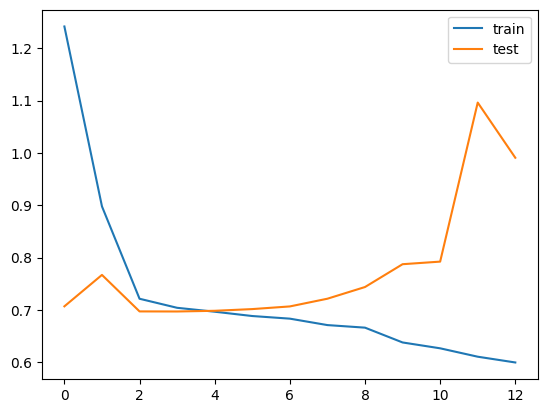

In [183]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()